In [1]:
%matplotlib inline


# Custom node icons

Example of using custom icons to represent nodes with matplotlib.

Images for node icons courtesy of www.materialui.co


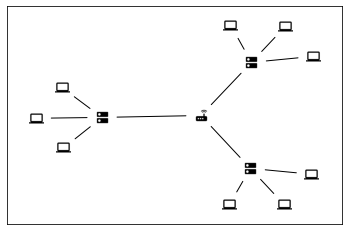

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import PIL

# Image URLs for graph nodes
icons = {
    "router": "icons/router_black_144x144.png",
    "switch": "icons/switch_black_144x144.png",
    "PC": "icons/computer_black_144x144.png",
}

# Load images
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

# Generate the computer network graph
G = nx.Graph()

G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 4):
        G.add_node("PC_" + str(i) + "_" + str(j), image=images["PC"])

G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))

# Get a reproducible layout and create figure
pos = nx.spring_layout(G, seed=1734289230)
fig, ax = plt.subplots()

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=15,
    min_target_margin=15,
)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")
plt.show()